In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np
import os
import scipy 
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import pdist
import pandas as pd
from explaination_config import ExplainationConfig

In [2]:
config = ExplainationConfig("transynergy")

In [3]:
feature_name = config.feature_names
print(feature_name)

['GDF5_A', 'NCOA3_A', 'NRIP1_A', 'AMER1_A', 'LZTR1_A', 'ABL1_A', 'CLTCL1_A', 'ABL2_A', 'ACACB_A', 'ZRSR2_A', 'USP9X_A', 'ACO1_A', 'RBM10_A', 'KDM5C_A', 'SMC1A_A', 'FRMD7_A', 'FOXB2_A', 'ACTB_A', 'ACTG1_A', 'FAM47C_A', 'ACVR1_A', 'ACVR1B_A', 'PKD1L2_A', 'ACVR2B_A', 'ACVR2A_A', 'CSMD2_A', 'ARID1A_A', 'GPRIN1_A', 'DYSF_A', 'CSMD3_A', 'ADAM10_A', 'STK11IP_A', 'TRRAP_A', 'H4C9_A', 'BIRC6_A', 'ADCY1_A', 'TMEM132B_A', 'PICALM_A', 'ADCY8_A', 'ADGRG4_A', 'GALNT13_A', 'ADD2_A', 'AXIN1_A', 'ADD3_A', 'BAP1_A', 'AXIN2_A', 'SCAF4_A', 'ADH1B_A', 'SORCS1_A', 'FZD1_A', 'USP31_A', 'PWWP2A_A', 'TBC1D32_A', 'H2AC16_A', 'H2AC6_A', 'NLN_A', 'H2AC17_A', 'PARP4_A', 'H2AC20_A', 'H2BC8_A', 'ADRA1A_A', 'ARID1B_A', 'PARP1_A', 'H2BC7_A', 'H2BC6_A', 'H2BC9_A', 'H2BC4_A', 'H2BC17_A', 'FAM166A_A', 'H3C4_A', 'H3C3_A', 'ZNF608_A', 'H3C8_A', 'H3C10_A', 'H4C4_A', 'AFM_A', 'H4C8_A', 'H4C2_A', 'H4C5_A', 'RPTOR_A', 'ACAN_A', 'NUTM2B_A', 'GSTA5_A', 'HECW2_A', 'JAG1_A', 'RTL9_A', 'AGTR2_A', 'APLNR_A', 'NR0B1_A', 'SORCS2_A', '

In [4]:
SAVE_PATH = "ig/results/transynergy_integrated_gradients.pt"

In [5]:
all_attributions = torch.load(SAVE_PATH, weights_only=False)
MEAN_ATTRIBUTION = all_attributions.mean().item()
MIN_ATTRIBUTION = all_attributions.min().item()
MAX_ATTRIBUTION = all_attributions.max().item()
print(f"Attributions shape: {all_attributions.shape}")

Attributions shape: torch.Size([22300, 1, 3, 2402])


In [6]:
N = all_attributions.shape[0]
attributions_reshaped = all_attributions.squeeze(1).reshape(N, -1)  
attributions_np = attributions_reshaped.numpy()
correlation_matrix = np.corrcoef(attributions_np, rowvar=False)  

mean_attributions = np.abs(attributions_np).mean(axis=0)
top_k_indices = np.argsort(mean_attributions)[-50:]  # Select top 50 features
top_k_features = [feature_name[i] for i in top_k_indices]
correlation_subset = correlation_matrix[top_k_indices][:, top_k_indices]

c:\Users\dell\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\dell\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


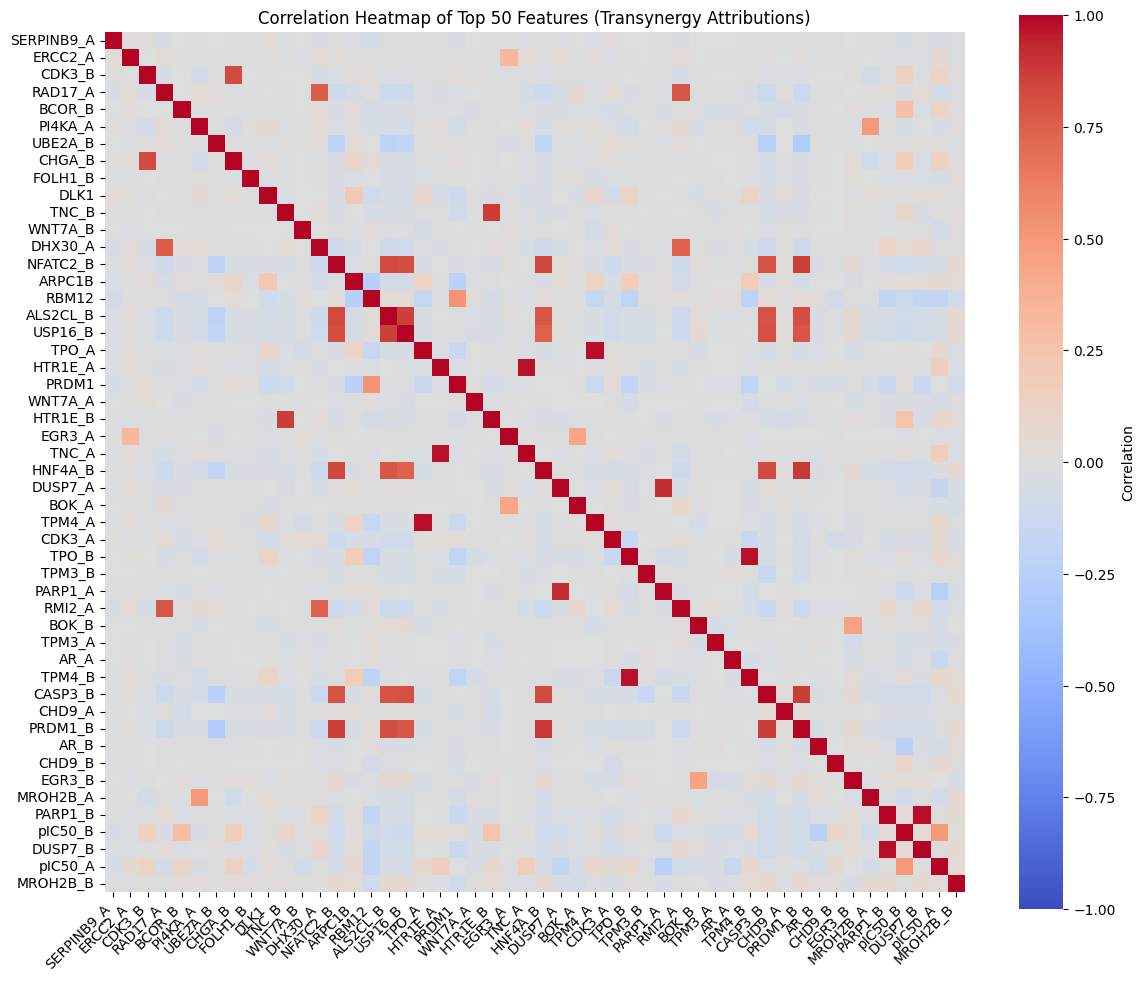

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_subset,
    xticklabels=top_k_features,
    yticklabels=top_k_features,
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    cbar_kws={'label': 'Correlation'},
)
plt.title("Correlation Heatmap of Top 50 Features (Transynergy Attributions)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()
plt.close()
